In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'sample_submission', 'sample_submission.csv', 'test.csv', 'train.csv', 'train']


Nous allons commencé par l'importation des librairies !!! :) 

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import scipy

%matplotlib inline

Ensuite télécharger le dataset et explorer les données qu'il contient !!! 

In [3]:
train = pd.read_csv ('../input/train.csv')
test = pd.read_csv ('../input/test.csv')
sample_submission = pd.read_csv ('../input/sample_submission.csv')

In [4]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

In [6]:
train.shape

(1458644, 11)

In [7]:
test.shape

(625134, 9)

In [8]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [9]:
train.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [10]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [11]:
test.tail()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N
625133,id0621643,2,2016-01-01 00:00:22,2,-73.981850,40.716881,-73.969330,40.769379,N


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


Information sur le dataFields !!! 

1/ id - a unique identifier for each trip
2/ vendor_id - a code indicating the provider associated with the trip record
3/ pickup_datetime - date and time when the meter was engaged
4/ dropoff_datetime - date and time when the meter was disengaged
5/ passenger_count - the number of passengers in the vehicle (driver entered value)
6/ pickup_longitude - the longitude where the meter was engaged
7/ pickup_latitude - the latitude where the meter was engaged
8/ dropoff_longitude - the longitude where the meter was disengaged
9/ dropoff_latitude - the latitude where the meter was disengaged
10/ store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
11/ trip_duration - duration of the trip in seconds

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.

In [14]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


On remarque qu'il y a existance d'une echelle ( de valeur comprise entre un x et un y) !!!

In [15]:
train.select_dtypes

<bound method DataFrame.select_dtypes of                 id  vendor_id      ...      store_and_fwd_flag trip_duration
0        id2875421          2      ...                       N           455
1        id2377394          1      ...                       N           663
2        id3858529          2      ...                       N          2124
3        id3504673          2      ...                       N           429
4        id2181028          2      ...                       N           435
5        id0801584          2      ...                       N           443
6        id1813257          1      ...                       N           341
7        id1324603          2      ...                       N          1551
8        id1301050          1      ...                       N           255
9        id0012891          2      ...                       N          1225
10       id1436371          2      ...                       N          1274
11       id1299289          2      

In [16]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [17]:
test.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
dtype: object

Le dtype est un object

Nous allons calculer la durée minimale et maximale d'un déplacement  dans la ville de New York !!!



In [18]:
train.trip_duration.min()

1

In [19]:
train.trip_duration.max()

3526282

La durée minimale d'un trip à New York est compris entre 1scd et 3526282 scd !!!  

In [20]:
train["pickup_datetime"].head()

0    2016-03-14 17:24:55
1    2016-06-12 00:43:35
2    2016-01-19 11:35:24
3    2016-04-06 19:32:31
4    2016-03-26 13:30:55
Name: pickup_datetime, dtype: object

In [21]:
train["dropoff_datetime"].head()

0    2016-03-14 17:32:30
1    2016-06-12 00:54:38
2    2016-01-19 12:10:48
3    2016-04-06 19:39:40
4    2016-03-26 13:38:10
Name: dropoff_datetime, dtype: object

In [22]:
train["store_and_fwd_flag"].head()

0    N
1    N
2    N
3    N
4    N
Name: store_and_fwd_flag, dtype: object

DATA PROCESSING !!!

1/ Répartition des outliers et description du train !!!

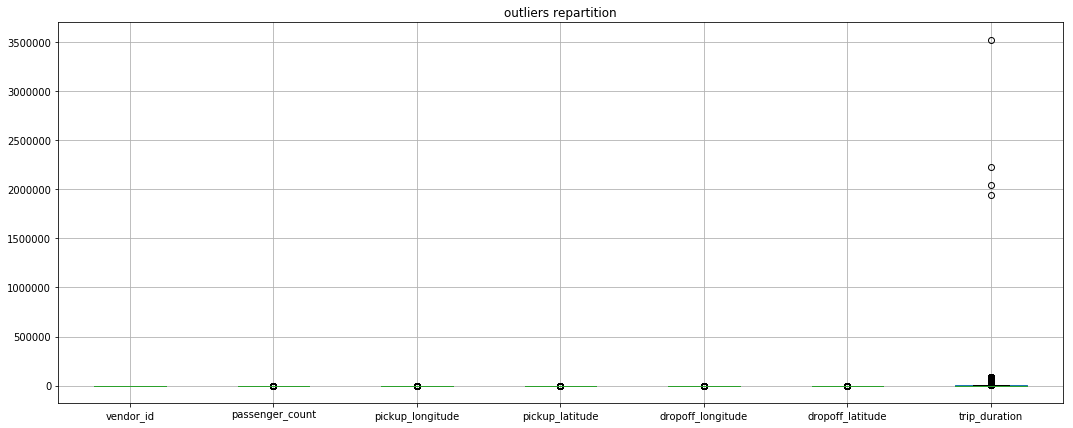

In [23]:
plt.subplots(figsize=(18,7))
plt.title("outliers repartition")
train.boxplot()

Après avoir vu les Outliers , le "trip-duration" attire le plus notre attention, nous allons nous concentré sur ce point alors !!! et checker ses valeurs qui sont inférieures à 5000 !!! :) 

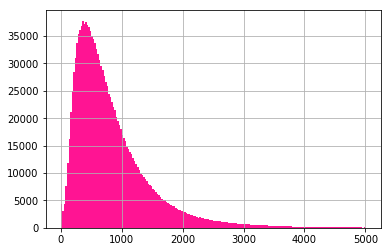

In [24]:
train.loc[train.trip_duration<5000,"trip_duration"].hist(bins=200,
                                                        color= "#FF1493"
                                                        )

Les trip_duration font presque tous moins de 1h30, c'est donc la raison pour laquelle nous allons resté focussed sur ces valeurs 

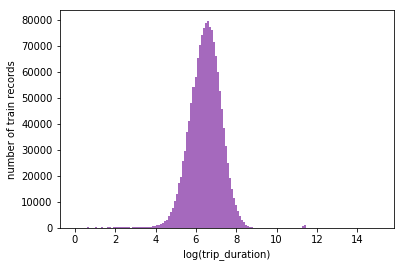

In [25]:
train['log_trip_duration'] = np.log(train['trip_duration'])
plt.hist(train['log_trip_duration'].values, bins=150,color= "#A569BD" )
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

Nous avons donc réaliser le log_Trip_Duration !!! 

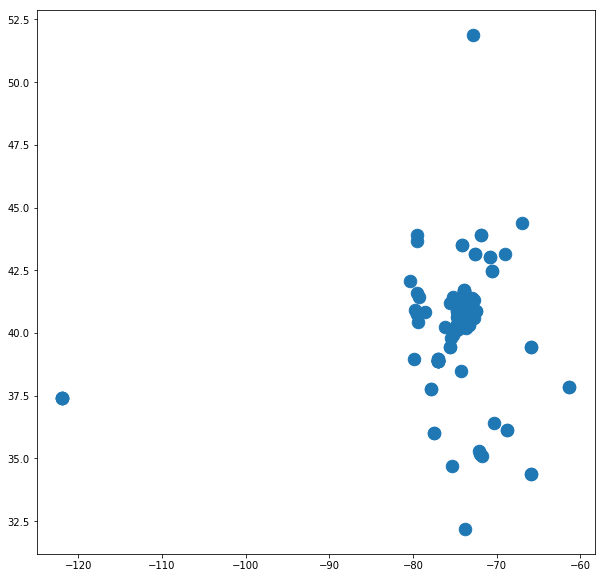

In [26]:
import matplotlib.pyplot as plt 
from matplotlib import animation
from matplotlib import cm
import base64
import io
longitude = list(train.pickup_longitude) + list(train.dropoff_longitude)
latitude = list(train.pickup_latitude) + list(train.dropoff_latitude)
plt.figure(figsize = (10, 10))
plt.plot(longitude,latitude,'.', alpha = 1, markersize = 25)
plt.show()

2/ Les missing values et les valeurs en doubles !!

In [27]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
log_trip_duration     0
dtype: int64

In [28]:
train.dropna(inplace=True)
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
log_trip_duration     0
dtype: int64

 on remarque qu'il n'y a pas de missing values on va voir alors combien de valeurs nous allions avoir !!

In [29]:
train = train[(train.trip_duration < 5000)]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454870 entries, 0 to 1458643
Data columns (total 12 columns):
id                    1454870 non-null object
vendor_id             1454870 non-null int64
pickup_datetime       1454870 non-null object
dropoff_datetime      1454870 non-null object
passenger_count       1454870 non-null int64
pickup_longitude      1454870 non-null float64
pickup_latitude       1454870 non-null float64
dropoff_longitude     1454870 non-null float64
dropoff_latitude      1454870 non-null float64
store_and_fwd_flag    1454870 non-null object
trip_duration         1454870 non-null int64
log_trip_duration     1454870 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 144.3+ MB


Nous sommes donc passés de 1458644 à 1454870 donc moins de 3774 valeurs perdues ( innexploitables ) dans notre data training !!!

3/ Les categorical variables !!!

Nous avons remarqué que le temps est donné en seconds, ce qui nous arrange pas , du coup nous allons le convertir !!!

In [30]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
train['hour'] = train.loc[:,'pickup_datetime'].dt.hour;
train['week'] = train.loc[:,'pickup_datetime'].dt.week;
train['weekday'] = train.loc[:,'pickup_datetime'].dt.weekday;
train['hour'] = train.loc[:,'pickup_datetime'].dt.hour;
train['month'] = train.loc[:,'pickup_datetime'].dt.month;

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [32]:
test['hour'] = test.loc[:,'pickup_datetime'].dt.hour;
test['week'] = test.loc[:,'pickup_datetime'].dt.week;
test['weekday'] = test.loc[:,'pickup_datetime'].dt.weekday;
test['hour'] = test.loc[:,'pickup_datetime'].dt.hour;
test['month'] = test.loc[:,'pickup_datetime'].dt.month;

In [33]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,hour,week,weekday,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.120297,17,11,0,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.496775,0,23,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661056,11,3,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.061457,19,14,2,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.075346,13,12,5,3


In [34]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,week,weekday,month
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,23,26,3,6
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,23,26,3,6
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,23,26,3,6
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,23,26,3,6
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,23,26,3,6


In [35]:
train.shape

(1454870, 16)

In [36]:
test.shape

(625134, 13)

Comme remarqué tout en haut loes de l'exploration du dataset, que les variables catégoriques seront : pickup_datetime  et dropoff_datetime , parcontre store_and_fwd_flag  nous ne sera d'aucune importance mm object , d'autant plus N=not a store and forward trip !!! 

In [37]:
cat_vars = ['store_and_fwd_flag']

In [38]:
for col in cat_vars:
    train[col] = train[col].astype('category').cat.codes
train.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,hour,week,weekday,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,6.120297,17,11,0,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6.496775,0,23,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,7.661056,11,3,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6.061457,19,14,2,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,6.075346,13,12,5,3


In [39]:
for col in cat_vars:
    test[col] = test[col].astype('category').cat.codes
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour,week,weekday,month
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,23,26,3,6
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,23,26,3,6
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,23,26,3,6
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,23,26,3,6
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,23,26,3,6


In [40]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'log_trip_duration', 'hour', 'week', 'weekday',
       'month'],
      dtype='object')

Feature engeneering

Création des features à partir de notre data existante afin de train notre modele de machine learning.

In [41]:
selection_train = ["passenger_count","store_and_fwd_flag", "pickup_longitude", "pickup_latitude", "dropoff_longitude","dropoff_latitude", "week", "weekday", "hour", "month"]
selection_test = ["passenger_count","store_and_fwd_flag", "pickup_longitude", "pickup_latitude", "dropoff_longitude","dropoff_latitude", "week", "weekday", "hour", "month"]

#selection_train = ["passenger_count","month", "weekday", "hour", "week", "store_and_fwd_flag"]
#selection_test = ["passenger_count", "month", "weekday", "hour", "week", "store_and_fwd_flag"]

y_train = np.log(train["trip_duration"]) # ma target 
X_train = train[selection_train] # ses features
X_test = test[selection_test]


In [42]:
import numpy as np
from sklearn.preprocessing import StandardScaler
X = np.random.randn(10, 3)
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
X_train.shape, X_test.shape, y_train.shape

((1454870, 10), (625134, 10), (1454870,))

In [45]:
y_train.head(20)

0     6.120297
1     6.496775
2     7.661056
3     6.061457
4     6.075346
5     6.093570
6     5.831882
7     7.346655
8     5.541264
9     7.110696
10    7.149917
11    7.028201
12    7.015712
13    5.560682
14    7.254178
15    5.351858
16    7.747597
17    6.594413
18    7.183112
19    5.525453
Name: trip_duration, dtype: float64

In [46]:
X_train.head(20)

,passenger_count,store_and_fwd_flag,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,week,weekday,hour,month
0,1,0,-73.982155,40.767937,-73.964630,40.765602,11,0,17,3
1,1,0,-73.980415,40.738564,-73.999481,40.731152,23,6,0,6
2,1,0,-73.979027,40.763939,-74.005333,40.710087,3,1,11,1
3,1,0,-74.010040,40.719971,-74.012268,40.706718,14,2,19,4
4,1,0,-73.973053,40.793209,-73.972923,40.782520,12,5,13,3
5,6,0,-73.982857,40.742195,-73.992081,40.749184,4,5,22,1
6,4,0,-73.969017,40.757839,-73.957405,40.765896,24,4,22,6
7,1,0,-73.969276,40.797779,-73.922470,40.760559,20,5,7,5
8,1,0,-73.999481,40.738400,-73.985786,40.732815,21,4,23,5
9,1,0,-73.981049,40.744339,-73.973000,40.789989,10,3,21,3


In [47]:
X_test.head(20)

,passenger_count,store_and_fwd_flag,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,week,weekday,hour,month
0,1,0,-73.988129,40.732029,-73.990173,40.756680,26,3,23,6
1,1,0,-73.964203,40.679993,-73.959808,40.655403,26,3,23,6
2,1,0,-73.997437,40.737583,-73.986160,40.729523,26,3,23,6
3,1,0,-73.956070,40.771900,-73.986427,40.730469,26,3,23,6
4,1,0,-73.970215,40.761475,-73.961510,40.755890,26,3,23,6
5,1,0,-73.991302,40.749798,-73.980515,40.786549,26,3,23,6
6,1,0,-73.978310,40.741550,-73.952072,40.717003,26,3,23,6
7,2,0,-74.012711,40.701527,-73.986481,40.719509,26,3,23,6
8,2,0,-73.992332,40.730511,-73.875618,40.875214,26,3,23,6
9,1,0,-73.993179,40.748760,-73.979309,40.761311,26,3,23,6


Pour réaliser le modeling Nous allons Train avec RandomForestRegressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
mrf = RandomForestRegressor(n_estimators=20)
mrf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Passer à la validation 

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
#crossval_scores = cross_val_score(mrf, X_train, y_train, cv=5, scoring='neg_mean_squared_log_error')
#crossval_scores

In [52]:
#for i in range(len(crossval_scores)):
#    crossval_scores[i] = np.sqrt(abs(crossval_scores[i]))
#crossval_scores

Nous allons réaliser les prédictions!!

In [53]:
y_test_pred = mrf.predict(X_test)
y_test_pred[:5]

array([6.59969527, 6.39229535, 6.36592922, 6.97869435, 5.98769785])

On va Submit !!!

In [54]:
submission = pd.read_csv('../input/sample_submission.csv')
submission.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


In [55]:
submission['trip_duration']= np.exp(y_test_pred)
submission.to_csv('asmasem_submission.csv', index=False)

In [56]:
submission.head(10)

,id,trip_duration
0,id3004672,734.871218
1,id3505355,597.225850
2,id1217141,581.685091
3,id2150126,1073.515820
4,id1598245,398.496156
5,id0668992,979.328672
6,id1765014,1361.776106
7,id0898117,674.341228
8,id3905224,2500.687348
9,id1543102,658.858722
